# Removing Trends - Lab

## Introduction

In this lab, you'll practice your detrending skills!

## Objectives

You will be able to:
* Learn how to remove trends and seasonality
* Use a log transformation to minimize non-stationarity
* Use rolling means to reduce non-stationarity
* Use differencing to reduce non-stationarity

## Detrending the Airpassenger data

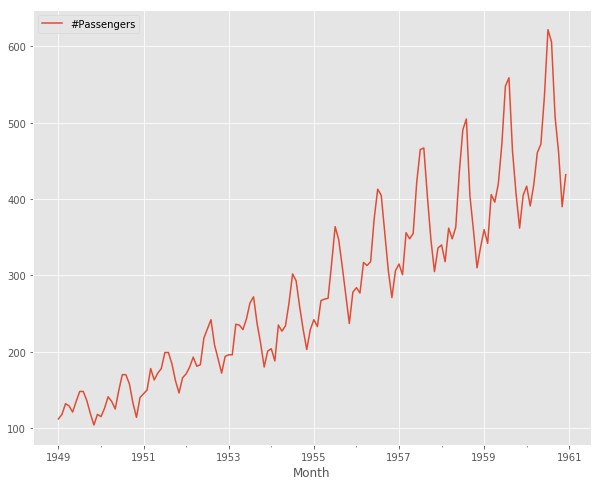

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import passengers.csv and set it as a time-series object. Plot the TS
passengers = pd.read_csv('passengers.csv')
passengers.Month = pd.to_datetime(passengers.Month, format='%Y-%m-%d')
passengers.set_index('Month', inplace=True)
passengers.index

plt.style.use('ggplot')
passengers.plot(figsize=(10, 8))

## Create a stationarity check

At this stage, we can use the code from previous labs to create a function `stationarity_check(ts)` that takes in a time series object and performs stationarity checks including rolling statistics and the Dickey Fuller test. 

We want the output of the function to:
- Plot the original time series along with the rolling mean and rolling standard deviation in one plot
- Output the results of the Dickey-Fuller test

In [14]:
orig.columns[0]

'#Passengers'

In [21]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab
def stationary_check(orig, win=12):
    orig_mean = orig.rolling(window=win, center=False).mean()
    orig_std = orig.rolling(window=win, center=False).std()

    plt.figure(figsize=(10, 8))
    plt.plot(orig, color='r', label='Original')
    plt.plot(orig_mean, color='b', label='Rolling Mean')
    plt.plot(orig_std, color='black', label='Rolling Std')
    plt.legend()

    from statsmodels.tsa.stattools import adfuller
    dftest = adfuller(orig[orig.columns[0]])
    dfoutput = pd.Series(dftest[:4], index=['Test Statistic', 'P-Value', '# of Lags', '# of Observations'])

    for key, val in dftest[4].items():
        dfoutput[f'Critical Value {key}'] = val

    print('Results from Dickey-Fuller Test:')

    return dfoutput

Use your newly created function on the airpassenger data set.

Results from Dickey-Fuller Test:


Test Statistic          0.815369
P-Value                 0.991880
# of Lags              13.000000
# of Observations     130.000000
Critical Value 1%      -3.481682
Critical Value 5%      -2.884042
Critical Value 10%     -2.578770
dtype: float64

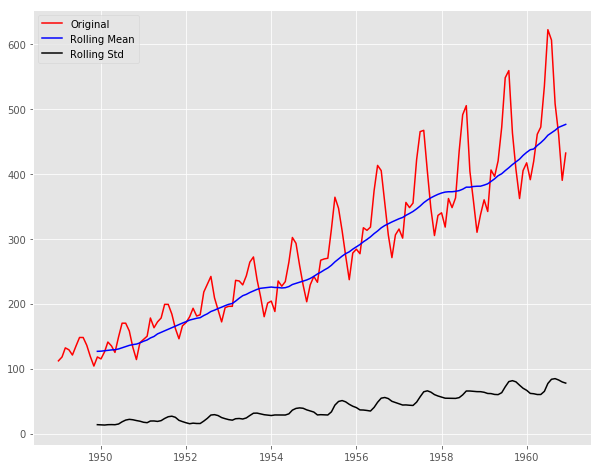

In [23]:
stationary_check(passengers)

## Perform a log() and sqrt() transform

Results from Dickey-Fuller Test:


Test Statistic         -1.717017
P-Value                 0.422367
# of Lags              13.000000
# of Observations     130.000000
Critical Value 1%      -3.481682
Critical Value 5%      -2.884042
Critical Value 10%     -2.578770
dtype: float64

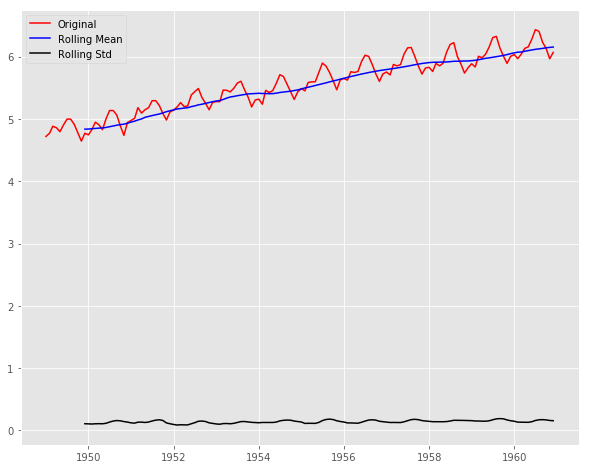

In [40]:
# Log transform timeseries and compare with original to check the effect
log_pass = np.log(passengers)
sqrt_pass = np.sqrt(passengers)
stationary_check(log_pass)

Results from Dickey-Fuller Test:


Test Statistic         -0.345854
P-Value                 0.918754
# of Lags              13.000000
# of Observations     130.000000
Critical Value 1%      -3.481682
Critical Value 5%      -2.884042
Critical Value 10%     -2.578770
dtype: float64

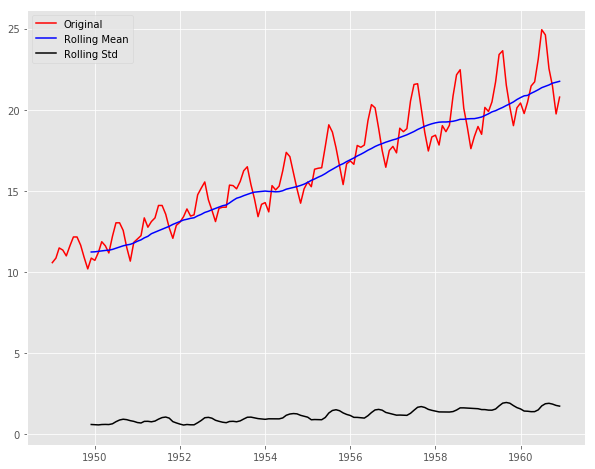

In [42]:
stationary_check(sqrt_pass)

moving forward, let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

Create a rolling mean using your log transformed time series, with a time window of 7. Plot the log-transformed time series and the rolling mean together.

Results from Dickey-Fuller Test:


Test Statistic         -1.717017
P-Value                 0.422367
# of Lags              13.000000
# of Observations     130.000000
Critical Value 1%      -3.481682
Critical Value 5%      -2.884042
Critical Value 10%     -2.578770
dtype: float64

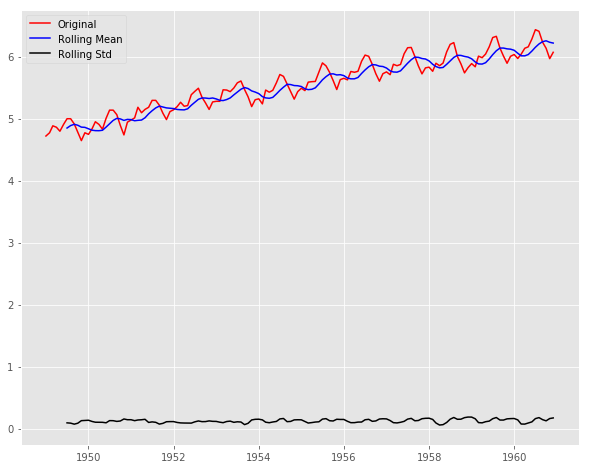

In [28]:
# your code here
stationary_check(log_pass, win=7)

Now, subtract the rolling mean from the time series, look at the 10 first elements of the result and plot the result.

In [30]:
# Subtract the moving average from the original data and check head for Nans
pass_mean = log_pass.rolling(window=7, center=False).mean()
log_minus_rollmean = log_pass - pass_mean
log_minus_rollmean.head(10)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,0.150059
1949-08-01,0.110242
1949-09-01,0.005404


In [34]:
# Drop the NaN values from timeseries calculated above
log_minus_rollmean.dropna(inplace=True)

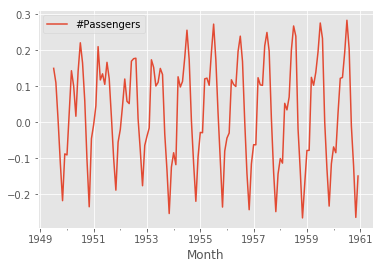

In [37]:
# Plot the result
log_minus_rollmean.plot()

Finally, use your function `check_stationarity` to see if this series is considered stationary!

Results from Dickey-Fuller Test:


Test Statistic         -2.348027
P-Value                 0.156946
# of Lags              14.000000
# of Observations     123.000000
Critical Value 1%      -3.484667
Critical Value 5%      -2.885340
Critical Value 10%     -2.579463
dtype: float64

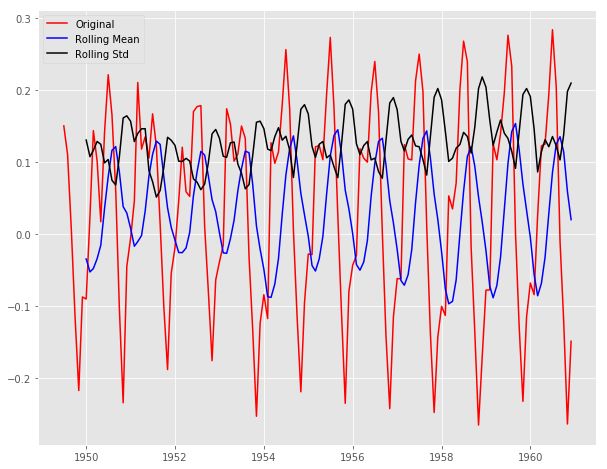

In [38]:
stationary_check(log_minus_rollmean, win=7)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?
While the mean appears to be much more stable, the seasonality still seems to be present with repeating variance levels. In addition, the mean still seems to be trending up slightly. This suggests the data is not yet stationary. A p-value of .156 indicates the data is not stationary either.

## Subtracting the weighted rolling mean

Repeat all the above for the *weighter* rolling mean. Start from the log-transformed data again. Compare the Dickey-Fuller Test results. What do you conclude?

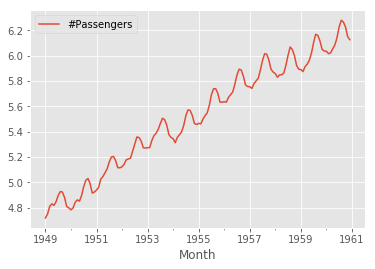

In [47]:
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log
ewm_log_pass = log_pass.ewm(halflife=2).mean()
# Plot the original data with exp weighted average
ewm_log_pass.plot()

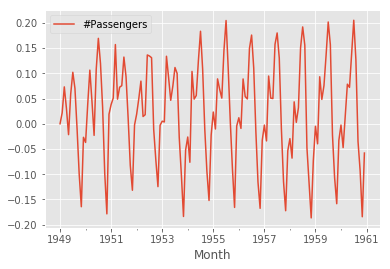

In [48]:
# Subtract the moving average from the original data and plot
log_minus_ewm = log_pass - ewm_log_pass
log_minus_ewm.plot()

Results from Dickey-Fuller Test:


(Test Statistic         -3.087696
 P-Value                 0.027477
 # of Lags              13.000000
 # of Observations     130.000000
 Critical Value 1%      -3.481682
 Critical Value 5%      -2.884042
 Critical Value 10%     -2.578770
 dtype: float64, Text(0.5, 1.0, 'Log Transformed, Weighted Mean'))

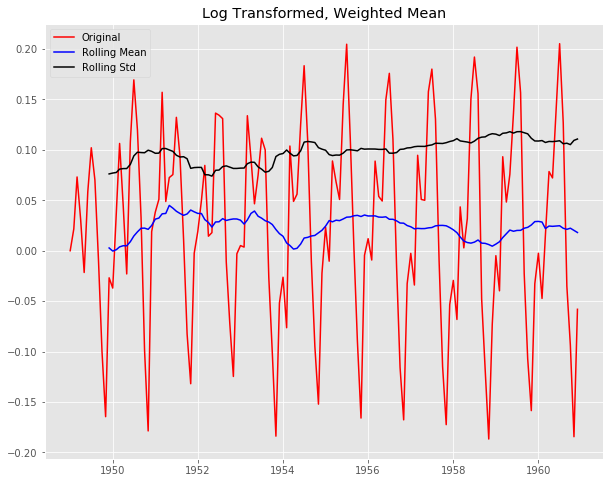

In [51]:
# do a stationarity check
stationary_check(log_minus_ewm), plt.title('Log Transformed, Weighted Mean')

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?
No obvious trend in variance nor mean. P-value of .0275. We conclude the data is stationary at the 95% confidence level.

## Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right amount of `periods`. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, run the `stationarity check` again.

In [56]:
# difference your data and look at the head
log_ewm_minus_diff = log_minus_ewm.diff(periods=12).dropna()
log_ewm_minus_diff.head()

,#Passengers
Month,
1950-01-01,-0.037016
1950-02-01,0.016679
1950-03-01,0.033226
1950-04-01,0.013826
1950-05-01,-0.001451


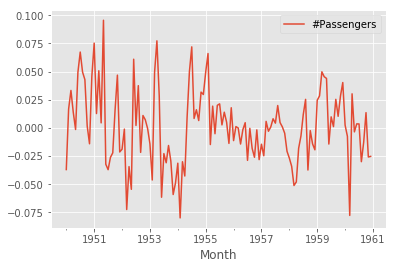

In [57]:
# plot your differenced time series
log_ewm_minus_diff.plot()

Results from Dickey-Fuller Test:


Test Statistic         -4.158133
P-Value                 0.000775
# of Lags              12.000000
# of Observations     119.000000
Critical Value 1%      -3.486535
Critical Value 5%      -2.886151
Critical Value 10%     -2.579896
dtype: float64

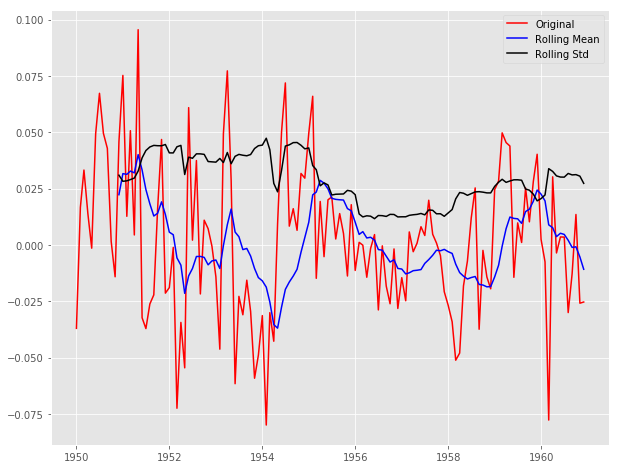

In [58]:
# drop nas
stationary_check(log_ewm_minus_diff)

### Your conclusion
No obvious trends anda p-value of .000775 indicates the data is now stationary.

## Summary 

In this lab, you learned how to make time series stationary through using log transforms, rolling means and differencing.